In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matplotlib.rcParams['savefig.dpi'] = 144
import seaborn

# Anomaly Detection, Session 1

The first two sessions will be focused on anomaly detection in time-series data.

**Time series** differ from other sources of data in that they are explicitly ordered.  The usual intent is to use past data to make predictions about the future, so only data from the past may be used to make a prediction.  For simplicity, we will ignore this restriction for most of these sessions, but will discuss it in the context of **online learning** towards the end.

**Anomaly detection**, or novelty detection, is attempting to find data that look different from the majority of the data.  It is typically an **unsupervised learning** system.  By this, we mean that the anomalous data is not **labeled**.  We must detect it by learning what the normal data look like.

## CitiBike Ridership Data

We will be looking at ridership from the CitiBike bike sharing system.  The data are available [online](https://s3.amazonaws.com/tripdata/index.html).  The zip files should be loaded in to the `anomaly/tripdata/` directory.  The script `download.sh` will do this for you.

Let's start by looking at an individual file.  Python's *zipfile* module will allow us to read data from those zip files without manually unzipping each one.

In [3]:
import zipfile

In [4]:
zf = zipfile.ZipFile('tripdata/201307-citibike-tripdata.zip', 'r')
zf.namelist()

['2013-07 - Citi Bike trip data.csv']

In [5]:
data = zf.read(zf.namelist()[0])
print '\n'.join(data.split('\n')[:5])

"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
"634","2013-07-01 00:00:00","2013-07-01 00:10:34","164","E 47 St & 2 Ave","40.75323098","-73.97032517","504","1 Ave & E 15 St","40.73221853","-73.98165557","16950","Customer",\N,"0"
"1547","2013-07-01 00:00:02","2013-07-01 00:25:49","388","W 26 St & 10 Ave","40.749717753","-74.002950346","459","W 20 St & 11 Ave","40.746745","-74.007756","19816","Customer",\N,"0"
"178","2013-07-01 00:01:04","2013-07-01 00:04:02","293","Lafayette St & E 8 St","40.73028666","-73.9907647","237","E 11 St & 2 Ave","40.73047309","-73.98672378","14548","Subscriber","1980","2"
"1580","2013-07-01 00:01:06","2013-07-01 00:27:26","531","Forsyth St & Broome St","40.71893904","-73.99266288","499","Broadway & W 60 St","40.76915505","-73.98191841","16063","Customer",\N

The *pandas* module provides a `DataFrame` class for powerful manipulation of data.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(zf.open(zf.namelist()[0]))
df.head(50)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1
5,861,2013-07-01 00:01:23,2013-07-01 00:15:44,511,E 14 St & Avenue B,40.729387,-73.977724,454,E 51 St & 1 Ave,40.754557,-73.965930,16223,Subscriber,1988,1
6,550,2013-07-01 00:01:59,2013-07-01 00:11:09,293,Lafayette St & E 8 St,40.730287,-73.990765,394,E 9 St & Avenue C,40.725213,-73.977688,16746,Customer,\N,0
7,288,2013-07-01 00:02:16,2013-07-01 00:07:04,224,Spruce St & Nassau St,40.711464,-74.005524,376,John St & William St,40.708621,-74.007222,16062,Subscriber,1985,2
8,766,2013-07-01 00:02:16,2013-07-01 00:15:02,432,E 7 St & Avenue A,40.726218,-73.983799,336,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2
9,773,2013-07-01 00:02:23,2013-07-01 00:15:16,173,Broadway & W 49 St,40.760647,-73.984427,479,9 Ave & W 45 St,40.760193,-73.991255,19365,Subscriber,1989,1


Looking at the above, we see that we can take a count of the number of trips in a day by the following steps
1. Extracting the day of the trip from the `starttime` field.
2. Grouping trips by day, and taking a count of how many trips happened on each day.

Once we do that, we can look for days that had anomalously high or low ridership counts. Which leads us to...

The Big Question
===

*In our dataset, on what days was ridership of citibike abnormally high or abnormally low?*

We will get just the day of the start time.  String processing is a bit faster than turning everything into datetime objects.

In [8]:
df['starttime'].str.split(' ', 1).apply(lambda x: x[0]).head()

0    2013-07-01
1    2013-07-01
2    2013-07-01
3    2013-07-01
4    2013-07-01
Name: starttime, dtype: object

Now, all we have to do is count how many time each date occurs:

In [9]:
df['starttime'].str.split(' ', 1).apply(lambda x: x[0]).value_counts().sort_index()

2013-07-01    16650
2013-07-02    22745
2013-07-03    21864
2013-07-04    22326
2013-07-05    21842
2013-07-06    20467
2013-07-07    20477
2013-07-08    21615
2013-07-09    26641
2013-07-10    25732
2013-07-11    24417
2013-07-12    19006
2013-07-13    26119
2013-07-14    29287
2013-07-15    28069
2013-07-16    29842
2013-07-17    30550
2013-07-18    28869
2013-07-19    26591
2013-07-20    25278
2013-07-21    30297
2013-07-22    25979
2013-07-23    32376
2013-07-24    35271
2013-07-25    31084
2013-07-26    34534
2013-07-27    32470
2013-07-28    23508
2013-07-29    34915
2013-07-30    37334
2013-07-31    37261
Name: starttime, dtype: int64

We can convert the index to actual datetime objects for convenience later.  Let's wrap this all up in a function.

In [10]:
def load_counts(fn):
    zf = zipfile.ZipFile(fn, 'r')
    df = pd.read_csv(zf.open(zf.namelist()[0]))
    counts = df['starttime'].str.split(' ', 1).apply(lambda x: x[0]).value_counts()
    if '-' in counts.index[0]:
        counts.index = pd.to_datetime(counts.index, format='%Y-%m-%d')
    else:
        counts.index = pd.to_datetime(counts.index, format='%m/%d/%Y')
    return counts.sort_index()

load_counts('tripdata/201307-citibike-tripdata.zip')

2013-07-01    16650
2013-07-02    22745
2013-07-03    21864
2013-07-04    22326
2013-07-05    21842
2013-07-06    20467
2013-07-07    20477
2013-07-08    21615
2013-07-09    26641
2013-07-10    25732
2013-07-11    24417
2013-07-12    19006
2013-07-13    26119
2013-07-14    29287
2013-07-15    28069
2013-07-16    29842
2013-07-17    30550
2013-07-18    28869
2013-07-19    26591
2013-07-20    25278
2013-07-21    30297
2013-07-22    25979
2013-07-23    32376
2013-07-24    35271
2013-07-25    31084
2013-07-26    34534
2013-07-27    32470
2013-07-28    23508
2013-07-29    34915
2013-07-30    37334
2013-07-31    37261
Name: starttime, dtype: int64

And let's do this for all of the files.

In [12]:
import glob
fns = glob.glob('tripdata/201[3-4][0-9][0-9]-citibike-tripdata.zip')
counts = pd.concat([load_counts(fn) for fn in sorted(fns)])

In [10]:
def read_counts_csv(csv_n):
    df = pd.read_csv(csv_n, names=["date", "starttime"])
    df["dt"] = pd.to_datetime(df["date"])
    counts = df["starttime"]
    counts.index = df["dt"]
    counts.sort_index()
    return counts

counts = read_counts_csv("counts.csv")

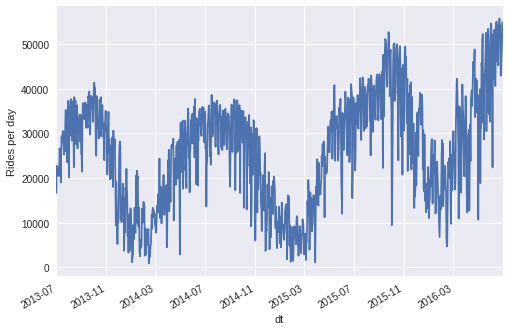

In [11]:
counts.plot()
plt.ylabel('Rides per day')

<function __main__.interact_count>

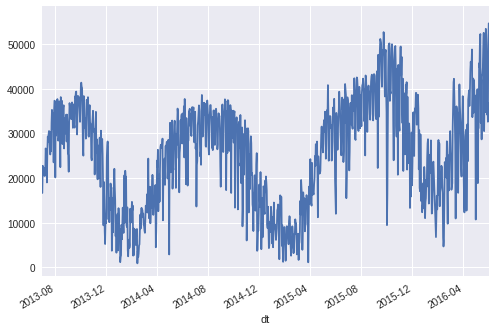

In [12]:
from datetime import datetime, timedelta
from ipywidgets import interact

f = datetime(2013, 7, 1)
l = datetime(2016, 6, 1)
def interact_count(first=0, last=(l - f).days):
    counts.plot()
    f_d = f + timedelta(days=first)
    l_d = f + timedelta(days=last)
    plt.xlim(f_d, l_d)

interact(interact_count, 
         first=(0, (l - f).days, 1),
         last=(0, (l-f).days, 1))

## Detrending

The first thing we notice is... seasonality. But we'll get back to that. I promise.

Until then, let's focus on what we want to accomplish. In particular, we want to build a basis for what "normal" ridership is, so we can determine days where ridership was anomalous. To this end, we will build a model of the ridership. This is an example of **supervised machine learning**.

In supervised machine learning, we have a $n \times p$ **feature matrix** $X_{ji}$.  Each column corresponds to one of the $p$ features, and each row to a particular observation, out of $n$ total.  We also have a **label vector** $y_j$ of length $n$.  The goal is to develop a model $f$ that predicts the labels from the corresponding feature row; that is,

$$ f(X_{j\cdot}) \approx y_j \ . $$

![Feature matrix](images/matrix.svg)

When the labels are numerical, the problem is known as **regression**.  Then the labels represent different categories, the problem is one of **classification**.  Our problem, estimating counts, is a regression problem.

### Linear Regression

A basic, yet quite powerful, machine learning model is **linear regression**.  It is a linear model, meaning that

$$ f(X_{j\cdot}) = \sum_i X_{ji} \beta_i = (X \cdot \beta )_j \ , $$

for some $p$-vector $\beta$.  Linear regression finds this vector by minimizing the MSE

$$ \frac 1 N \left|X\cdot\beta - y\right|^2 \ . $$

There is a closed-form solution:

$$ \hat\beta = (X^T X)^{-1} X^T y \ . $$

Now, with that basis, let's model. Ridership has been growing with time. The growth doesn't appear to be linear, but quadratic might be a good fit. This presents a problem: how do we model a quadratic trend with linear regression?

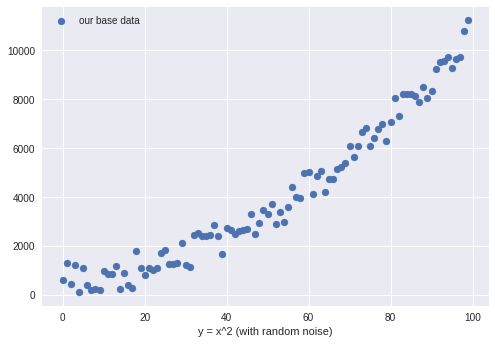

In [13]:
import numpy as np

# 4 plots: 
# first, y = x^2
# second, transform the y values by taking the sqrt (osquare the x values)
# third, a linear regression fitting plot #2
# last, that same linear regression fitting plot #1

x = np.arange(100)
y = (x ** 2) + (1500 * np.random.uniform( size=100))
plt.scatter(x, y, label="our base data")
plt.legend()
plt.xlabel("y = x^2 (with random noise)")

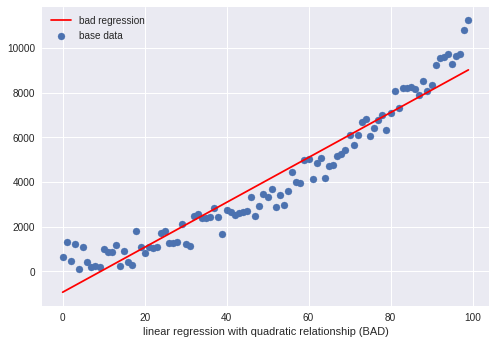

In [14]:
plt.scatter(x, y, label="base data")
bad_model = np.poly1d(np.polyfit(x, y, deg=1))
plt.plot(x, bad_model(x), 'r-', label="bad regression")
plt.xlabel("linear regression with quadratic relationship (BAD)")
plt.legend()

This is bad - do not try to model non-linear data linearly. Instead, transform your features...

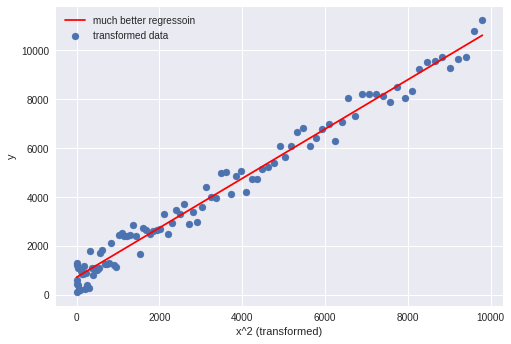

In [15]:
transformed = x ** 2
model = np.poly1d(np.polyfit(transformed, y, deg=1))
plt.scatter(transformed, y, label="transformed data")
plt.plot(transformed, model(transformed), 'r-', label="much better regressoin")
plt.xlabel("x^2 (transformed)")
plt.ylabel("y")
plt.legend()

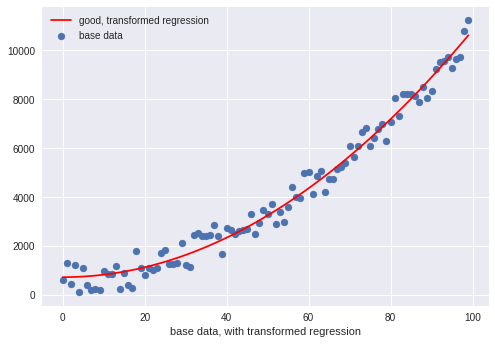

In [16]:
plt.scatter(x, y, label="base data")
plt.plot(x, model(transformed), 'r-', label="good, transformed regression")
plt.xlabel("base data, with transformed regression")
plt.legend()

Let's engineer our first two features! 
1. $t$ - simply the date - we'll use number of days since day 0.
2. $t^2$ - number of days since day 0, squared.

Now, we have the following setup for our linear regression:

**Inputs**
- `t`
- `t^2`

**Outputs**
- `count`


**Model**

`count = c +  a * t + b * t^2`

### Scikit Learn

This particular transformation is a particularly simple example of **feature engineering**.  Feature engineering is where much of the work of machine learning is done, so libraries will provide mechanisms to assist this process.

We will be using the *Scikit Learn* module for machine learning.  It provides many tools, but the core is two types of classes: **transformers** and **estimators**.  Transformers take in a feature matrix and return a transformed version:
``` python
class Transformer(base.BaseEstimator, base.TransformerMixin):
    
  def fit(self, X, y=None):
    # Learn about the data
    return self
  
  def transform(self, X):
    return ... # The transformed features
```

In [17]:
import numpy as np

from sklearn import base
from sklearn import metrics

In [18]:
class QuadBackground(base.BaseEstimator, base.TransformerMixin):
            
    def fit(self, X, y=None):
        self.X0 = X[0]
        return self
    
    def transform(self, X):
        days = (X - self.X0).days
        return np.c_[days, days**2]
    
# our base feature matrix is just the dates
X = counts.index
QuadBackground().fit(X).transform(X)

array([[      0,       0],
       [      1,       1],
       [      2,       4],
       ..., 
       [   1093, 1194649],
       [   1094, 1196836],
       [   1095, 1199025]])

Estimators have a `predict()` method that returns the model's prediction for the label of a particular row.
``` python                                                 
class Estimator(base.BaseEstimator, base.RegressorMixin):
  
  def fit(self, X, y):
    # Learn about the data
    return self
    
  def predict(self, X):
    return ... # The predicted labels
```
We'll use a linear regression estimator provided by Scikit Learn.

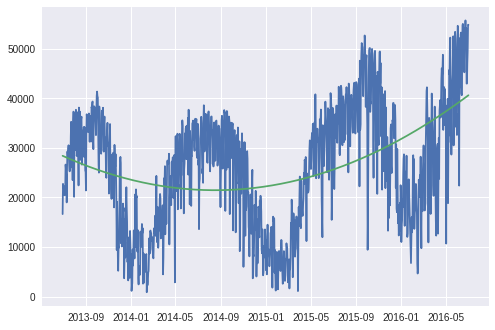

In [19]:
from sklearn.linear_model import LinearRegression

X_trans = QuadBackground().fit(counts.index).transform(counts.index)
lr = LinearRegression()
lr.fit(X_trans, counts)
plt.plot(counts.index, counts, counts.index, lr.predict(X_trans))

### How well are we doing? A bit more theory

Both regression and classification have a number of different metrics to gauge the effectiveness of a model.  The most commonly used metric for regression is the **mean-squared error** (MSE):

$$ \mbox{MSE} = \frac 1 N \sum_{j=1}^N \left[ f(X_{j\cdot}) - y_j \right]^2 \ . $$

The MSE has units of $y^2$, which can make its size difficult to judge.  We often use the **root mean-squared error** (RMSE) instead.

In [20]:
lr.intercept_

28412.930980604891

In [21]:
lr.coef_

array([-33.75480574,   0.04102287])

In [22]:
np.sqrt(metrics.mean_squared_error(counts, lr.predict(X_trans)))

11136.378225165368

This still leaves us with the problem that we have no basis for whatever our RMSE is. How much better can we do? How much better are we doing than the dumbest possible prediction? A good baseline is the mean model, which has a MSE equal to the variance of the data.  We'll take the square root to look at RMSE.

In [23]:
np.sqrt(counts.var())

12250.136374096797

This model is a smal improvement.

**Exercise**: Growth is often exponential. Use a transformer to model exponential, instead of quadratic, growth, as a feature. How do the two models compare?

## Detecting seasonality

**Seasonality** is the tendency of time-series data to have underlying cycles.  We typically wish to remove these variations before undertaking further analysis.

It's very clear we have underlying cycles. What do you think contributes to those, and how frequently do those cycles happen?

Once you have some guesses, how do we pull out concrete information about cyclical behavior? The first tool we we look at is the **autocorrelation**.  For two random variables, $X$ and $Y$, the covariance is defined as

$$ \mbox{Cov}[X, Y] = E\left[(X - E[X])(Y - E[Y])\right] = E[XY] - E[X]E[Y] \ .$$

If there is no correlation between the random variables, the covariance is 0.  If the two random variables always return the same value,

$$ \mbox{Cov}[X, Y] = \mbox{Cov}[X, X] = \mbox{Var}[X] \ . $$

The autocovariance of a time-series signal is just the covariance of the signal with a time-lagged copy.  The autocorrelation normalizes this by the variance of the signal:

$$ \rho(X \mid \tau) = \frac{\mbox{Cov}[X_t, X_{t+\tau}]}{\mbox{Var[X]}} \ . $$

Pandas provides a built-in autocorrelation plot.

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


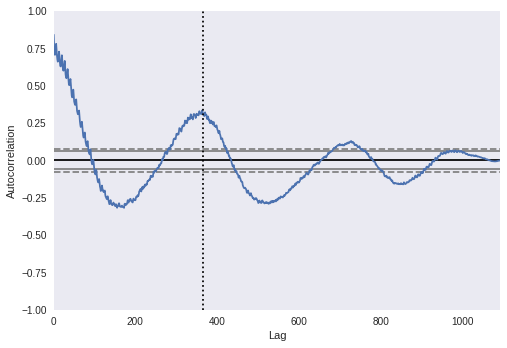

In [24]:
pd.tools.plotting.autocorrelation_plot(counts)
plt.axvline(365, color='k', ls=':')

The yearly cycle is clearly visible.  Zooming in, more detail becomes obvious.

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


<function __main__.change_axes>

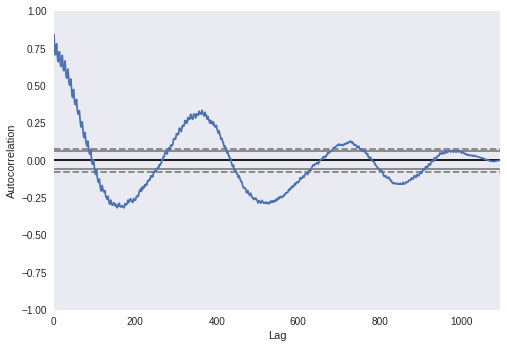

In [25]:
from ipywidgets import interact

last = (counts.index[-1] - counts.index[0]).days
def change_axes(bottom=0, top=last):
    pd.tools.plotting.autocorrelation_plot(counts)
    plt.xlim(bottom, top)
interact(change_axes, bottom=(0, last, 1), top=(0, last, 1))

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


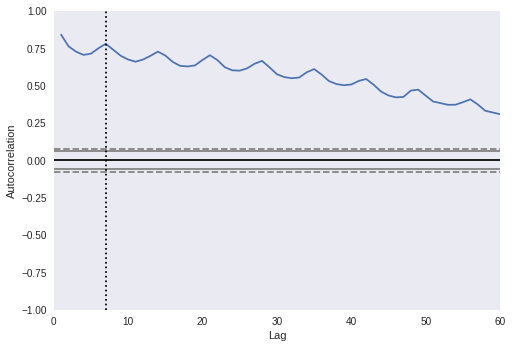

In [26]:
pd.tools.plotting.autocorrelation_plot(counts)
plt.xlim(0,60)
plt.axvline(7, color='k', ls=':')

**Fourier analysis** takes advantage of the fact that any signal can be written as the sum of sinusoids: 

$$ X_t = \sum_\nu A_\nu \sin(2\pi\nu t) + B_\nu \cos(2\pi\nu t) \ . $$

The **Fourier transform** is used to read out the coefficients $A_\nu$ and $B_\nu$ from the original signal.  If the signal is sampled, this process is known as the **discrete Fourier transform** (DFT).  The standard algorithm for doing this is the **fast Fourier transform** (FFT), which is implemented in the *numpy* module.

Quite often, we are not concerned with the Fourier coefficients directly, but with the total power provided at frequency $\nu$, $A_\nu^2 + B_\nu^2$.  This **power spectrum** is easily derived from the Fourier transform.

(In practice, Fourier analysis uses complex exponentials instead of sines and cosines.  Instead of real coefficients $A_\nu$ and $B_\nu$, the FFT returns a single complex coefficient $C_\nu$.  The contribution to the power spectrum is $|C_\nu|^2$.

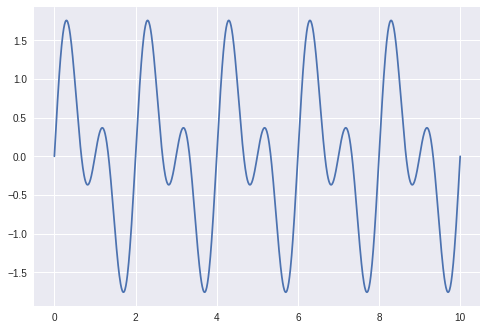

In [27]:
fft_x = 1.0 * np.linspace(0, 10, 1000)
fft_y = np.sin(np.pi * fft_x) + np.sin(2.0 * np.pi * fft_x) # 2 components, frequency 1 and 1/2
plt.plot(fft_x, fft_y)

(0, 2)

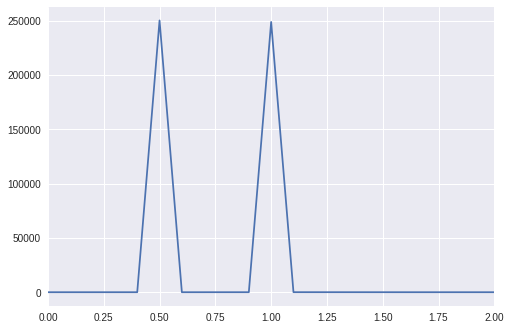

In [28]:
fft = np.fft.fft(fft_y)
plt.plot((1.0 * np.arange(len(fft)))/ 10.,  np.abs(fft) ** 2)
plt.xlim(0, 2)

In [29]:
fft_counts = np.fft.fft(counts - counts.mean())
yrs = (counts.index[-1] - counts.index[0]).days / 365.

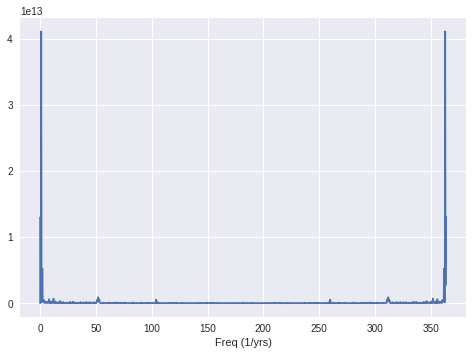

In [30]:
plt.plot(1.0*np.arange(len(fft_counts)) / yrs, np.abs(fft_counts)**2)
plt.xlabel('Freq (1/yrs)')

While the Fourier transform returns information on frequencies up to the sampling frequency (1/day, or 365/year), only the results up to half of that are valid.  This is due to the problem of **aliasing**.  In a sampled signal, you can not distinguish a signal with a frequency above half of the sampling rate, known as the **Nyquist freqency**, from a signal with a frequency below that.

(-2, 2)

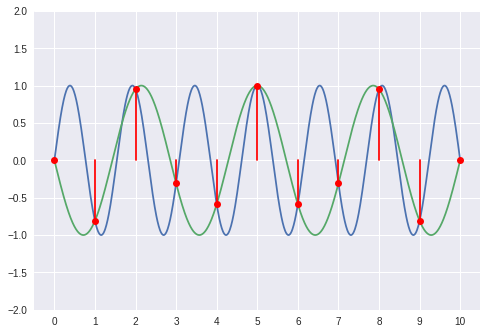

In [31]:
t = np.linspace(0, 10, 1000)
ts = np.arange(0, 11)
f = 0.65
plt.plot(t, np.sin(2*np.pi * f * t), t, -np.sin(2*np.pi * (1 - f) * t))
ml, sl, bl = plt.stem(ts, np.sin(2*np.pi * f * ts))
plt.setp(ml, 'markerfacecolor', 'r')
plt.setp(sl, 'color', 'r')
plt.setp(bl, visible=False)
plt.xticks(ts)
plt.ylim(-2,2)

Zooming in on the low-frequency components, we can clearly see the yearly cycle dominating all other components.

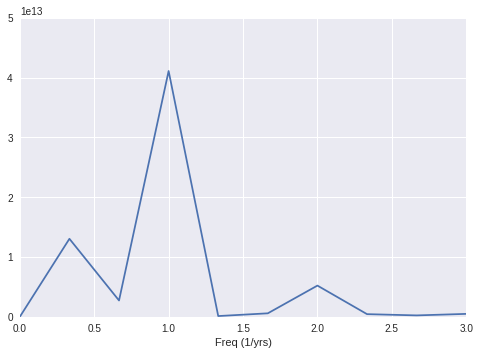

In [32]:
plt.plot(1.0*np.arange(len(fft_counts)) / yrs, np.abs(fft_counts)**2)
plt.axis([0,3, 0, 5e13])
plt.xlabel('Freq (1/yrs)')

Changing focus some more, we can cleary see the weekly cycle, at 52/year, as well as additional peaks at 12/year and 8/year.

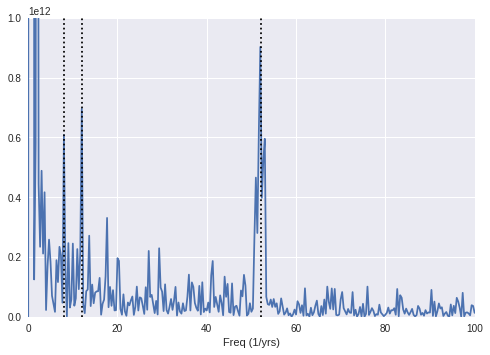

In [33]:
plt.plot(1.0*np.arange(len(fft_counts)) / yrs, np.abs(fft_counts)**2)
plt.axis([0,100, 0, 1e12])
plt.xlabel('Freq (1/yrs)')
plt.axvline(365/7., color='k', ls=':')
plt.axvline(12, color='k', ls=':')
plt.axvline(8, color='k', ls=':')

### Back to modelling

We now have indications of monthly, weekly, yearly, and (perhaps) quarterly cycles. Our next model will be to consider only the yearly cycles:

$$ f(t) = A \sin\frac{2\pi t}{365} + B\cos\frac{2\pi t}{365} + f_0 \ . $$

At first glance, it may appear that linear regression is not suitable, since the model is not linear in $t$.  However, just as above with our quadratic features, this is an easy feature transform to make.

Instead, of considering $t$, let's we consider the $n\times 2$ feature matrix

$$ X = \left[ \sin\frac{2\pi t}{365}\ \ \cos\frac{2\pi t}{365} \right] \ , $$

we do actually have a linear model. This is to say, we're attempting to estimate the coefficients $A$ and $B$ from above with our linear regression. It's just another feature transformation!

In [34]:
class FourierComponents(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, period):
        self.period = period
    
    def fit(self, X, y=None):
        self.X0 = X[0]
        return self
    
    def transform(self, X):
        dt = (X - self.X0).days * 2 * np.pi / self.period
        return np.c_[np.sin(dt), np.cos(dt)]

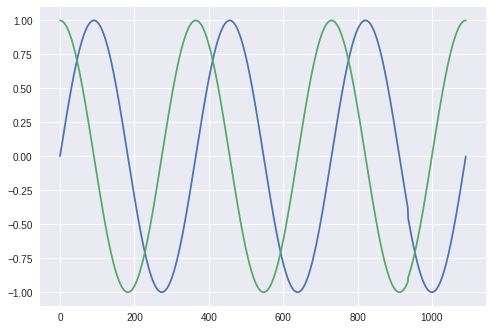

In [35]:
fc = FourierComponents(365)
X_trans = fc.fit(counts.index).transform(counts.index)
plt.plot(X_trans)

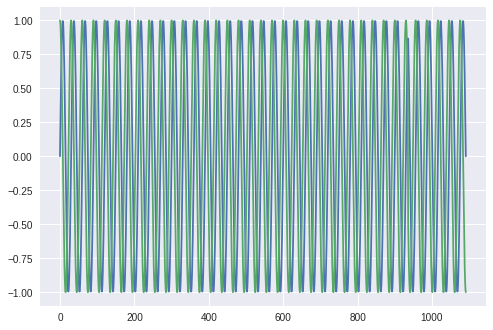

In [52]:
fc1 = FourierComponents(30)
X_trans1 = fc1.fit(counts.index).transform(counts.index)
plt.plot(X_trans1)

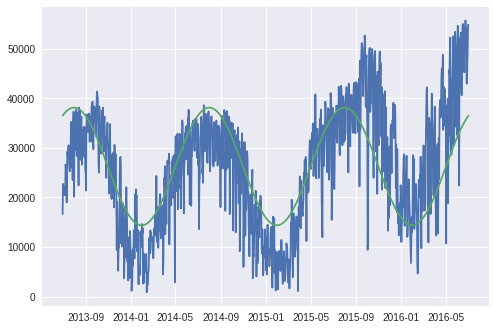

In [36]:
lr = LinearRegression()
lr.fit(X_trans, counts)
plt.plot(counts.index, counts, counts.index, lr.predict(X_trans))

Handling each transformer manually quickly gets tedious and error-prone.  Scikit Learn comes to the rescue with **pipelines**.  Pipelines take a series of transformers and (optionally) an estimator.  A pipeline acts as an estimator itself.  When it is fit, it fits the first transformer, transforms with the first transformer, uses that value to fit the second transformer, transforms with the second transformer, *etc.*, until finally fitting the estimator.  When predict is called on the pipeline, it sends the feature matrix through each of the transformers, before finally calling predict on the estimator.

In [37]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('fourier', FourierComponents(365)),
                 ('lr', LinearRegression())])
pipe.fit(counts.index, counts)

Pipeline(steps=[('fourier', FourierComponents(period=365)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Note we just pass our basic feature set (in this case, the dates we're considering), and the pipeline handles the feature extraction. We can then predict without needing to worry about transformation... 

In [38]:
np.sqrt(metrics.mean_squared_error(counts, pipe.predict(counts.index)))

8919.6020407194228

Much easier! We can also see this model is performing significantly better than our first model, which captured growth as a factor. 

### Pipelines and combining models

We got our first taste of how pipelines make our life easier above. Now, let's see how scikit-learn makes our life easier by allowing us to combine our seasonal model and our quadratic growth model.

Previously, we had 2 models:

$$ m_{yearly}(t) = A \sin\frac{2\pi t}{365} + B\cos\frac{2\pi t}{365} + f_0  $$

$$ m_{growth}(t) = C \cdot t + D \cdot t^2 + g_0 $$

Where the first model determines coefficients for $A$ and $B$, and the second for $C$ and $D$. We now want to combine those into one, larger model:

$$ m_{yearly + growth}(t) = A \sin\frac{2\pi t}{365} + B\cos\frac{2\pi t}{365} + f_0  +  C \cdot t + D \cdot t^2 + g_0 $$

(Note we technically only have one intercept term, which you can think of as some weighted average of $f_0 + g_0$ if you like).

Scikit-learn lets us easily translate this math into code with something called a `FeatureUnion`: Basically, apply each transformer to the input and combine all columns that get returned.

In [39]:
from sklearn.pipeline import FeatureUnion
union = FeatureUnion([('fourier', FourierComponents(365)),
                      ('growth', QuadBackground())])
u = union.fit(counts.index).transform(counts.index)
u[2]

array([ 0.03442161,  0.9994074 ,  2.        ,  4.        ])

6993.1120344856345

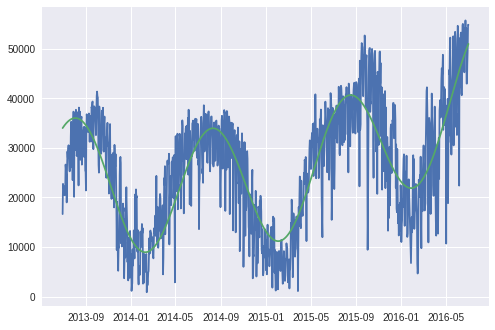

In [40]:
pipe = Pipeline([('union', union),
                 ('lr', LinearRegression())])
pipe.fit(counts.index, counts.values)
plt.plot(counts.index, counts, counts.index, pipe.predict(counts.index))
np.sqrt(metrics.mean_squared_error(counts.values, pipe.predict(counts.index)))

### Exercise
1. Account for the monthly seasonality.  Examine how ridership varies over the month.  Develop a model to account for this.  How much does this improve the RMSE?


### Categorical Features

So far, the features we've extracted have been *numerical* in nature: they clearly exist along a scale, with a clear ordering and spatial positioning, and we think about processing them as numbers. 

We now consider the weekly cycle we saw.  If we group the results by day of the week, we can get a better feel for the cycle.

In [41]:
day_df = pd.DataFrame(
    {'day': counts.index.dayofweek, 'count': counts.values}
)
day_df.head()

,count,day
0,16650,0
1,22745,1
2,21864,2
3,22326,3
4,21842,4


([<matplotlib.axis.XTick at 0x7ffb4e2863d0>,
 <a list of 7 Text xticklabel objects>)

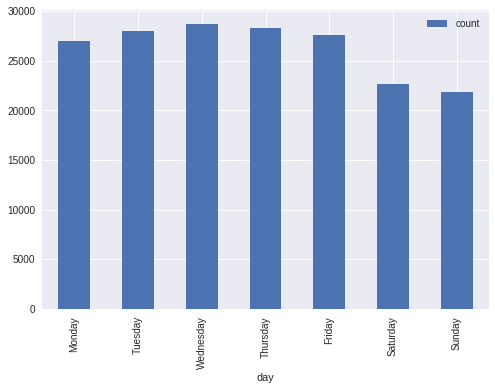

In [42]:
day_df.groupby('day').mean().plot(kind='bar')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

The weekly cycle is not particularly sinusoidal.  Instead of treating the day of the week as a continuous variable, we will treat it as a **categorical feature**.  Such features denote membership in a class, without any particular ordering of those classes.  Therefore, we do not encode them in a single feature, but we create a new feature for each category.  Each row gets a 1 in the column corresponding to its category and a 0 in all others.  This is known as **one-hot encoding** or **dummy variables**.

In [43]:
class DayofWeek(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def day_vector(self, day):
        v = np.zeros(7)
        v[day] = 1
        return v
    
    def transform(self, X):
        return np.stack(self.day_vector(d) for d in X.dayofweek)

In [44]:
DayofWeek().transform(counts.index)[:10]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]])

When used with linear regression, one-hot encoding produces per-category means.

In [45]:
dow = DayofWeek().fit_transform(counts.index)
lr = LinearRegression(fit_intercept = False).fit(dow,  counts)
day_df.groupby("day").mean()

,count
day,
0,26987.333333
1,28022.782051
2,28671.955414
3,28303.356688
4,27577.596154
5,22663.664516
6,21875.580645


In [46]:
lr.coef_

array([ 26987.33333333,  28022.78205128,  28671.95541401,  28303.3566879 ,
        27577.59615385,  22663.66451613,  21875.58064516])

Now, let's add these features to our pipeline:

In [47]:
union = FeatureUnion([('fourier', FourierComponents(365)),
                      ('dayofweek', DayofWeek()),
                      ('growth', QuadBackground())])

In [48]:
pipe = Pipeline([('union', union),
                 ('lr', LinearRegression(fit_intercept=False))])

In [49]:
pipe.fit(counts.index, counts)
np.sqrt(metrics.mean_squared_error(counts, pipe.predict(counts.index)))

6502.0455715592243

To understand what a model is doing correctly, and what it's missing, it's useful to plot the **residual**, the difference between the actual and predicted values.

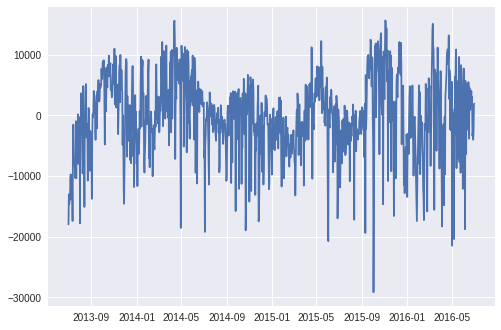

In [50]:
plt.plot(counts - pipe.predict(counts.index))

# Add Monthly Seasonality

In [59]:
union = FeatureUnion([('fourier1', FourierComponents(365)),
                      ('fourier2', FourierComponents(30)),
                      ('dayofweek', DayofWeek()),
                      ('growth', QuadBackground())])
u = union.fit(counts.index).transform(counts.index)
u[2]

array([ 0.03442161,  0.9994074 ,  0.40673664,  0.91354546,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.        ,  4.        ])

In [61]:
pipe = Pipeline([('union', union),
                 ('lr', LinearRegression(fit_intercept=False))])

In [62]:
pipe.fit(counts.index, counts)
np.sqrt(metrics.mean_squared_error(counts, pipe.predict(counts.index)))

6471.1136854605384

# Weekly Seasonality Using Fourier

In [63]:
union = FeatureUnion([('fourier1', FourierComponents(365)),
                      ('fourier2', FourierComponents(30)),
                      ('fourier3', FourierComponents(7)),
                      ('growth', QuadBackground())])
u = union.fit(counts.index).transform(counts.index)
u[2]

array([ 0.03442161,  0.9994074 ,  0.40673664,  0.91354546,  0.97492791,
       -0.22252093,  2.        ,  4.        ])

In [64]:
pipe = Pipeline([('union', union),
                 ('lr', LinearRegression(fit_intercept=False))])

In [65]:
pipe.fit(counts.index, counts)
np.sqrt(metrics.mean_squared_error(counts, pipe.predict(counts.index)))

10345.73048719018